In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [76]:
telecom.shape

(99999, 226)

In [77]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [78]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [79]:
#Usage Based Churn:
telecom['churn'] = (telecom.total_ic_mou_9 == 0) & (telecom.total_og_mou_9 == 0) & ( (telecom.vol_2g_mb_9 == 0) | (telecom.vol_3g_mb_9 == 0) )

#removing 9th month features
telecom = telecom.drop(list(telecom.filter(regex='_9')), axis=1)

telecom.shape

(99999, 173)

In [80]:
telecom.churn.value_counts()

False    89483
True     10516
Name: churn, dtype: int64

In [81]:
# Filtering hight value customer
telecom['av_rech_amt'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7) / (telecom.total_rech_num_6 + telecom.total_rech_num_7)
telecom.av_rech_amt.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

count    99814.000000
mean        48.304356
std         52.076165
min          0.000000
10%         12.214865
20%         17.777778
30%         23.235294
40%         29.142857
50%         36.645752
60%         45.333333
70%         56.387518
80%         70.800000
90%         92.000000
99%        217.365000
max       4010.000000
Name: av_rech_amt, dtype: float64

In [82]:
telecom = telecom[telecom["av_rech_amt"] >=56.387518] 

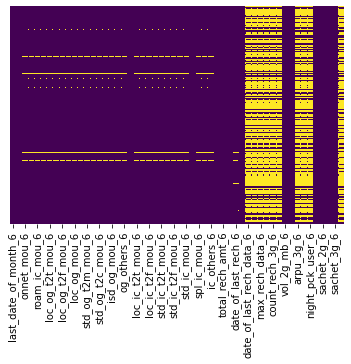

In [83]:
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [84]:
telecom.churn.value_counts()

False    27169
True      2775
Name: churn, dtype: int64

In [85]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Columns: 174 entries, mobile_number to av_rech_amt
dtypes: bool(1), float64(137), int64(27), object(9)
memory usage: 39.8+ MB


In [86]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
telecom.describe(exclude=['bool', 'float64', 'int64'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,29944,29747,29541,29558,29318,28578,10173,10118,10327
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/28/2014,8/31/2014
freq,29944,29747,29541,4328,4377,3566,557,539,628


In [87]:
telecom['last_date_of_month_6'] = pd.to_datetime(telecom['last_date_of_month_6'])
telecom['last_date_of_month_7'] = pd.to_datetime(telecom['last_date_of_month_7'])
telecom['last_date_of_month_8'] = pd.to_datetime(telecom['last_date_of_month_8'])
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'])
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'])
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'])


In [88]:
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                515
std_og_t2o_mou                515
loc_ic_t2o_mou                515
last_date_of_month_6            0
last_date_of_month_7          197
last_date_of_month_8          403
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   989
onnet_mou_7                   934
onnet_mou_8                  1534
offnet_mou_6                  989
offnet_mou_7                  934
offnet_mou_8                 1534
roam_ic_mou_6                 989
roam_ic_mou_7                 934
roam_ic_mou_8                1534
roam_og_mou_6                 989
roam_og_mou_7                 934
roam_og_mou_8                1534
loc_og_t2t_mou_6              989
loc_og_t2t_mou_7              934
loc_og_t2t_mou_8             1534
loc_og_t2m_mou_6              989
loc_og_t2m_mou_7              934
loc_og_t2m_mou_8             1534
loc_og_t2f_mou

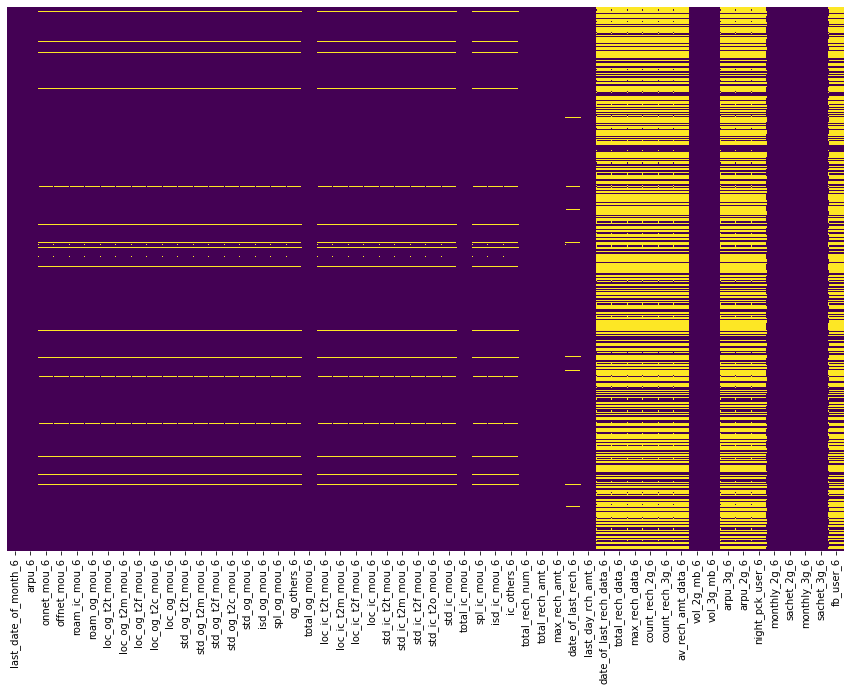

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

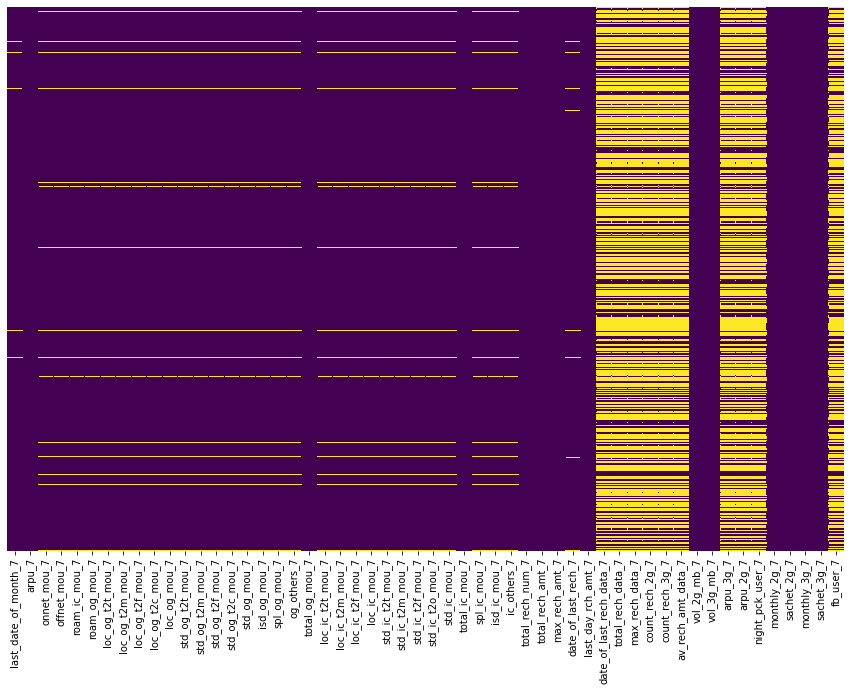

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_7'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

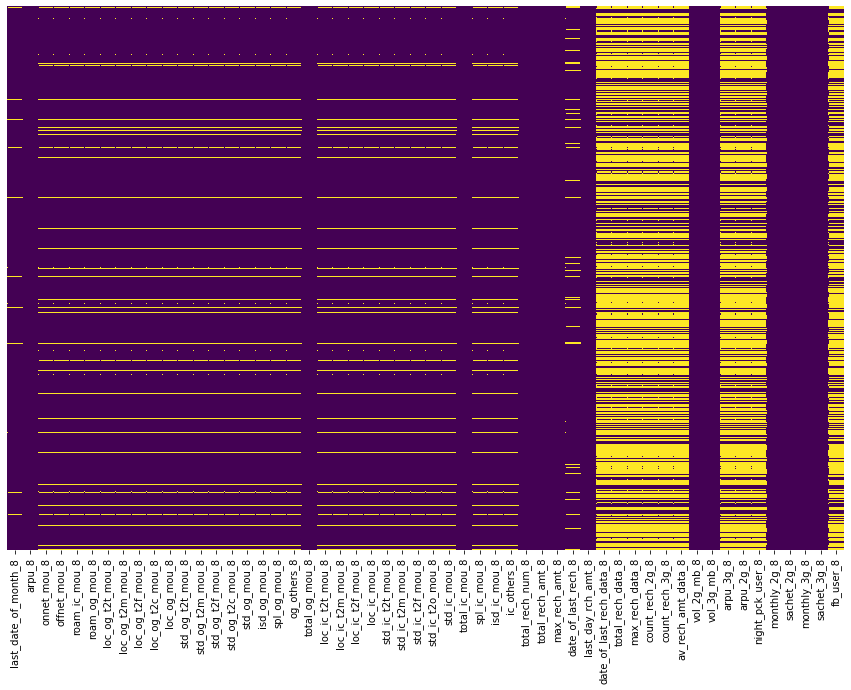

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_8'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [92]:
#dropping cols
telecom = telecom.drop(['date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6','date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7','date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8'], axis=1)

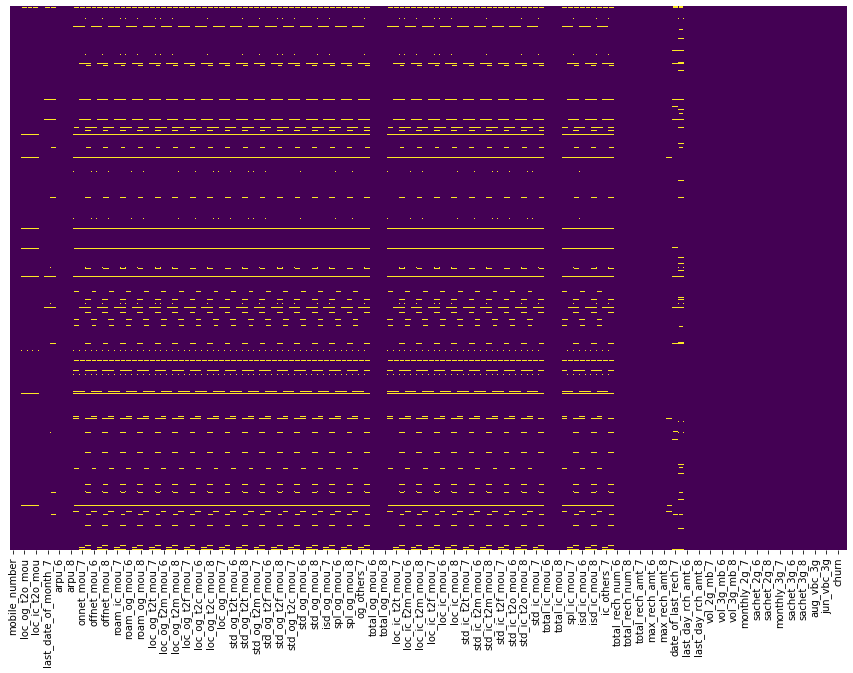

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [94]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,2.994400e+04,29944.0,29429.0,29429.0,29429.0,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.0,29010.0,28410.0,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.0,29010.0,28410.0,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000
mean,7.001260e+09,109.0,0.0,0.0,0.0,477.216026,472.777378,443.769340,223.177445,223.418307,206.190085,341.038423,339.856561,316.657508,16.374998,12.713451,12.781130,26.719926,20.091048,20.093606,83.027272,83.057070,79.894595,164.151746,161.852917,157.357718,7.995394,8.060383,7.675661,1.0

In [95]:
telecom = telecom.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
telecom.shape

(29944, 129)

In [96]:
telecom.isnull().sum()

mobile_number            0
circle_id                0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6            989
onnet_mou_7            934
onnet_mou_8           1534
offnet_mou_6           989
offnet_mou_7           934
offnet_mou_8          1534
roam_ic_mou_6          989
roam_ic_mou_7          934
roam_ic_mou_8         1534
roam_og_mou_6          989
roam_og_mou_7          934
roam_og_mou_8         1534
loc_og_t2t_mou_6       989
loc_og_t2t_mou_7       934
loc_og_t2t_mou_8      1534
loc_og_t2m_mou_6       989
loc_og_t2m_mou_7       934
loc_og_t2m_mou_8      1534
loc_og_t2f_mou_6       989
loc_og_t2f_mou_7       934
loc_og_t2f_mou_8      1534
loc_og_t2c_mou_6       989
loc_og_t2c_mou_7       934
loc_og_t2c_mou_8      1534
loc_og_mou_6           989
loc_og_mou_7           934
loc_og_mou_8          1534
std_og_t2t_mou_6       989
std_og_t2t_mou_7       934
std_og_t2t_mou_8      1534
std_og_t2m_mou_6       989
std_og_t2m_mou_7       934
s

In [97]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,2.994400e+04,29944.0,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000
mean,7.001260e+09,109.0,477.216026,472.777378,443.769340,223.177445,223.418307,206.190085,341.038423,339.856561,316.657508,16.374998,12.713451,12.781130,26.719926,20.091048,20.093606,83.027272,83.057070,79.894595,164.151746,161.852917,157.357718,7.995394,8.060383,7.675661,1.059151,1.192751,1.281591,255.183390,252.979324,244.936780,129.836818,132.555954,118.715940,144.762036,149.946877,131.655835,2.471786,2.486382,2.286114,277.074374,284.992867,252.661309,2.203267,2.159372,1.979431,3.883160,4.494004,4.6

In [98]:
telecom = telecom.dropna(axis='rows', how='any')
telecom.shape

(27973, 129)

In [99]:
telecom.isnull().sum()

mobile_number         0
circle_id             0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6    

In [100]:
telecom.churn.value_counts()

False    26532
True      1441
Name: churn, dtype: int64

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from sklearn import metrics

In [102]:
X = telecom.drop('churn', axis=1)
y = telecom['churn']

feature_cols = X.columns

# Handle class imbalance
nm = NearMiss()
X, y = nm.fit_sample(X, y)

# X = X.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

# X = X.astype('float64').dtypes

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Columns: 128 entries, mobile_number to av_rech_amt
dtypes: float64(101), int64(27)
memory usage: 2.8 MB


In [104]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
len(y_test)

952

In [107]:
# Adaboost Classifier Model 
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), 
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5
)
ada_clf.fit(X_train, y_train)
y_pred3 = ada_clf.predict(X_test)
print("AdaBoostClassifier:\naccuracy_score : ", accuracy_score(y_test, y_pred3))
confusion = metrics.confusion_matrix(y_test, y_pred3)
print(confusion)
print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

AdaBoostClassifier:
accuracy_score :  0.8298319327731093
[[399  93]
 [ 69 391]]
TPR:  0.85
FPR:  0.18902439024390244


In [108]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "base_estimator__criterion" : ["gini", "entropy"],
#     "base_estimator__splitter" :   ["best", "random"],
#     "base_estimator__max_depth" : [2],
#     "n_estimators": [100, 150, 200]
# }
# DTC = DecisionTreeClassifier(random_state = 11)
# ABC = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R", learning_rate=0.5)

# grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'recall')
# grid_search_ABC.fit(X_train, y_train)

# y_pred4 = grid_search_ABC.predict(X_test)
# print("AdaBoostClassifier:\naccuracy_score : ", accuracy_score(y_test, y_pred4))
# confusion = metrics.confusion_matrix(y_test, y_pred4)
# print(confusion)
# print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
# print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

AdaBoostClassifier:
accuracy_score :  0.8371848739495799
[[409  83]
 [ 72 388]]
TPR:  0.8434782608695652
FPR:  0.16869918699186992


In [109]:
log_clf = LogisticRegression(max_iter=200)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
)

In [110]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(confusion)
    print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
    print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

LogisticRegression 0.8035714285714286
[[398  94]
 [ 93 367]]
TPR:  0.7978260869565217
FPR:  0.1910569105691057
RandomForestClassifier 0.8455882352941176
[[411  81]
 [ 66 394]]
TPR:  0.8565217391304348
FPR:  0.16463414634146342
SVC 0.842436974789916
[[409  83]
 [ 67 393]]
TPR:  0.8543478260869565
FPR:  0.16869918699186992
VotingClassifier 0.8445378151260504
[[409  83]
 [ 65 395]]
TPR:  0.8586956521739131
FPR:  0.16869918699186992


In [111]:
#Feature Importance

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
importance = dtc.feature_importances_

for i,v in enumerate(importance):
    print("Feature : {0}, importance : {1}".format(feature_cols[i],v))

Feature : mobile_number, importance : 0.01839423868069548
Feature : circle_id, importance : 0.0
Feature : arpu_6, importance : 0.0178184669929425
Feature : arpu_7, importance : 0.12702351084099414
Feature : arpu_8, importance : 0.006502411035515569
Feature : onnet_mou_6, importance : 0.006052714037898408
Feature : onnet_mou_7, importance : 0.003948778612596634
Feature : onnet_mou_8, importance : 0.004609955890139328
Feature : offnet_mou_6, importance : 0.004223983731715281
Feature : offnet_mou_7, importance : 0.003710770038686703
Feature : offnet_mou_8, importance : 0.0013820725144088224
Feature : roam_ic_mou_6, importance : 0.00294494830675583
Feature : roam_ic_mou_7, importance : 0.0009293715016951789
Feature : roam_ic_mou_8, importance : 0.0013820725144088224
Feature : roam_og_mou_6, importance : 0.002418626900215439
Feature : roam_og_mou_7, importance : 0.0
Feature : roam_og_mou_8, importance : 0.24628496177699616
Feature : loc_og_t2t_mou_6, importance : 0.001727590643011028
Featur

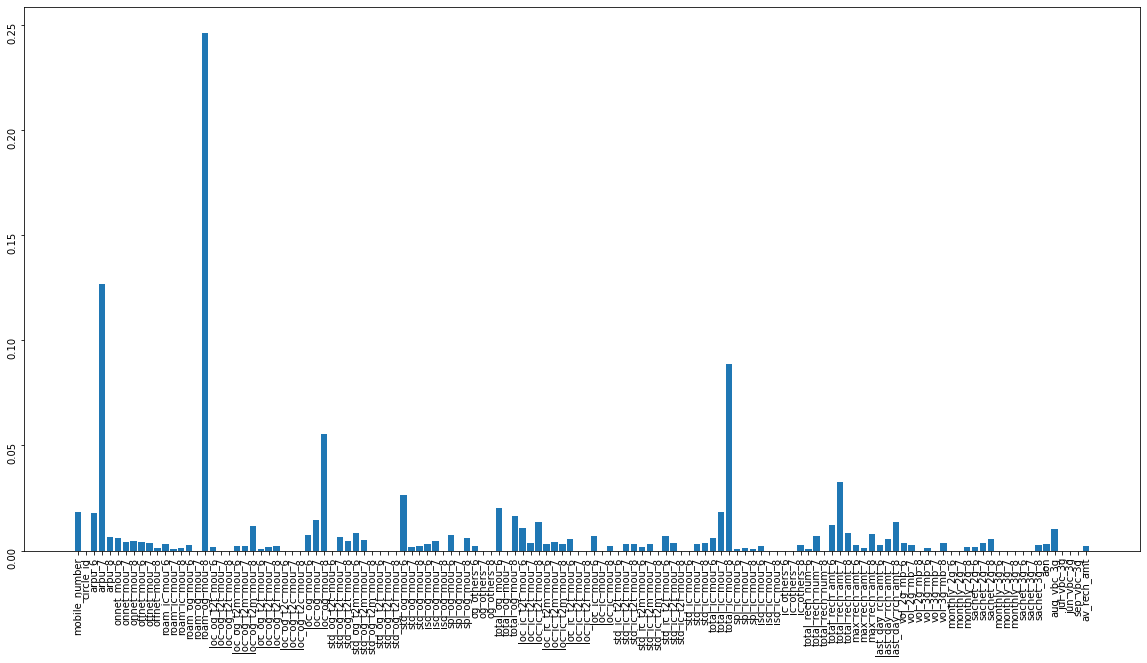

In [112]:
plt.figure(figsize=(20,10))
plt.bar(feature_cols, importance)
plt.tick_params(rotation=90)
plt.show()

In [113]:
X2 = telecom.drop('churn', axis=1)
y2 = telecom['churn']
nm = NearMiss()
X2, y2 = nm.fit_sample(X2, y2)

In [114]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=0.95)
X2_reduced = pca.fit_transform(X2)
pca.explained_variance_ratio_

array([0.999987])

In [116]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [117]:
log_clf2 = LogisticRegression()
rnd_clf2 = RandomForestClassifier()
svm_clf2 = SVC()
voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf2), ('rf', rnd_clf2), ('svc', svm_clf2)]
)

for clf in (log_clf2, rnd_clf2, svm_clf2, voting_clf2):
    clf.fit(X_train2, y_train2)
    y_pred2 = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test2, y_pred2))

LogisticRegression 0.542016806722689
RandomForestClassifier 0.5031512605042017
SVC 0.4831932773109244
VotingClassifier 0.4989495798319328
